In [ ]:
#Data Sourcing
#Data Cleaning
#Categorical Analysis
#Numerical Analysis

In [260]:
#Data Sourcing#
import pandas as pd

df_yt = pd.read_csv('topSubscribed.csv')

In [261]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [262]:
df_yt.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [263]:
#Data Cleaning#
df_yt.isnull().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [264]:
df_yt.duplicated().sum()

0

# EDA of Youtube Channels

In [265]:
#Top 10 music YT channels with high subscribers#
music_df = df_yt.query('Category == "Music"').groupby('Youtube Channel')['Subscribers'].sum().reset_index()

In [266]:
top_10 = music_df.sort_values(by = 'Subscribers', ascending = False).head(10)
#top_10
Youtube_Channel = top_10['Youtube Channel']
Subscribers = top_10['Subscribers']

Text(0.5, 1.0, 'Highest count of subscriber for Top 10 music industry')

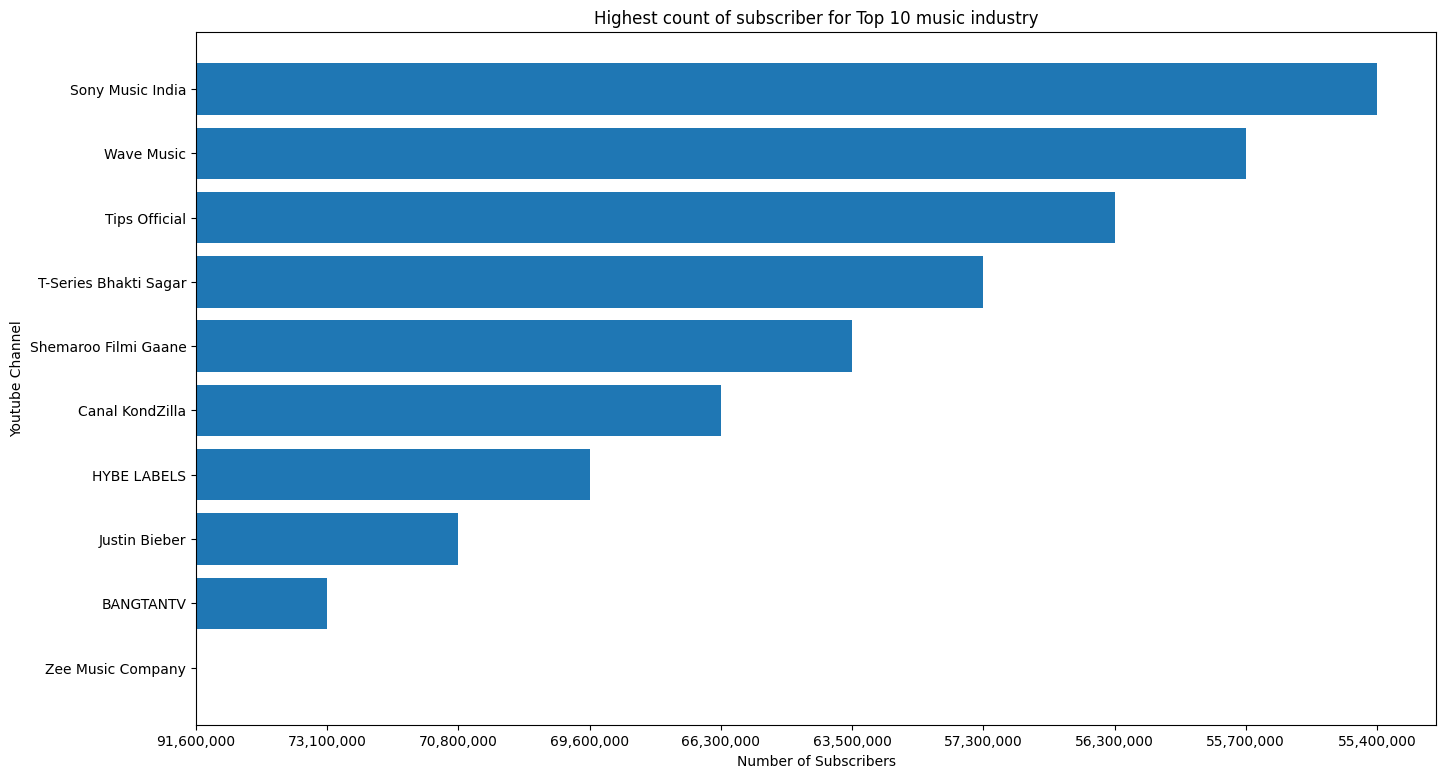

In [267]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize =(16, 9))

plt.barh(Youtube_Channel, Subscribers)
plt.xlabel('Number of Subscribers')
plt.ylabel('Youtube Channel')
plt.title('Highest count of subscriber for Top 10 music industry')

In [268]:
#Youtube channels with highest video views#
video_df = df_yt.groupby('Youtube Channel')['Video Views'].sum().reset_index()

In [269]:
top_10_videos = video_df.sort_values(by = 'Video Views', ascending = False).head(10)
Youtube_ChannelT = video_df['Youtube Channel']
videoViews = video_df['Video Views']
top_10_videos

,Youtube Channel,Video Views
330,Health Time,"992,361,227"
637,Prajapati News,"958,355,786"
62,Apple,"942,922,750"
725,Sony SAB,"91,117,292,875"
805,Think Music India,"9,958,947,026"
664,Robin Hood Gamer,"9,955,629,684"
730,Spider Slack,"9,948,034,173"
21,ABS-CBN News,"9,938,076,313"
852,Vlad and Niki Arabic,"9,910,020,745"
206,Desi Music Factory,"9,909,079,287"


In [270]:
import plotly.express as px

fig = px.bar(top_10_videos, x='Youtube Channel', y='Video Views')
fig.update_layout(xaxis_tickangle=90)
fig.show()


In [271]:
df1 = df_yt.drop(["Started", "Rank"], axis = 1 )
df1.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category
0,T-Series,"234,000,000","212,900,271,553","18,515",Music
1,YouTube Movies,"161,000,000",0,0,Film & Animation
2,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education
3,SET India,"150,000,000","137,828,094,104","103,200",Shows
4,MrBeast,"128,000,000","21,549,128,785",733,Entertainment


In [273]:
category_list= list(df1.Category.unique())
v_count = []
df1['Video Count'] = df1['Video Count'].str.replace(',', '').astype(float)

for i in category_list:
    x = df1[df1.Category == i]
    mean_count = x["Video Count"].mean()
    v_count.append(mean_count)
df_count=pd.DataFrame({'categorylist':category_list,'VideoCount': v_count})
new_index1 = df_count.VideoCount.sort_values(ascending = False).index.values
sorted_df_count = df_count.reindex(new_index1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'News & Politics'),
  Text(1, 0, 'Nonprofits & Activism'),
  Text(2, 0, 'Shows'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'People & Blogs'),
  Text(6, 0, 'Trailers'),
  Text(7, 0, 'Gaming'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Movies'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Autos & Vehicles'),
  Text(12, 0, 'Film & Animation'),
  Text(13, 0, 'Music'),
  Text(14, 0, 'Science & Technology'),
  Text(15, 0, 'Howto & Style'),
  Text(16, 0, 'Comedy'),
  Text(17, 0, 'Travel & Events'),
  Text(18, 0, 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels')])

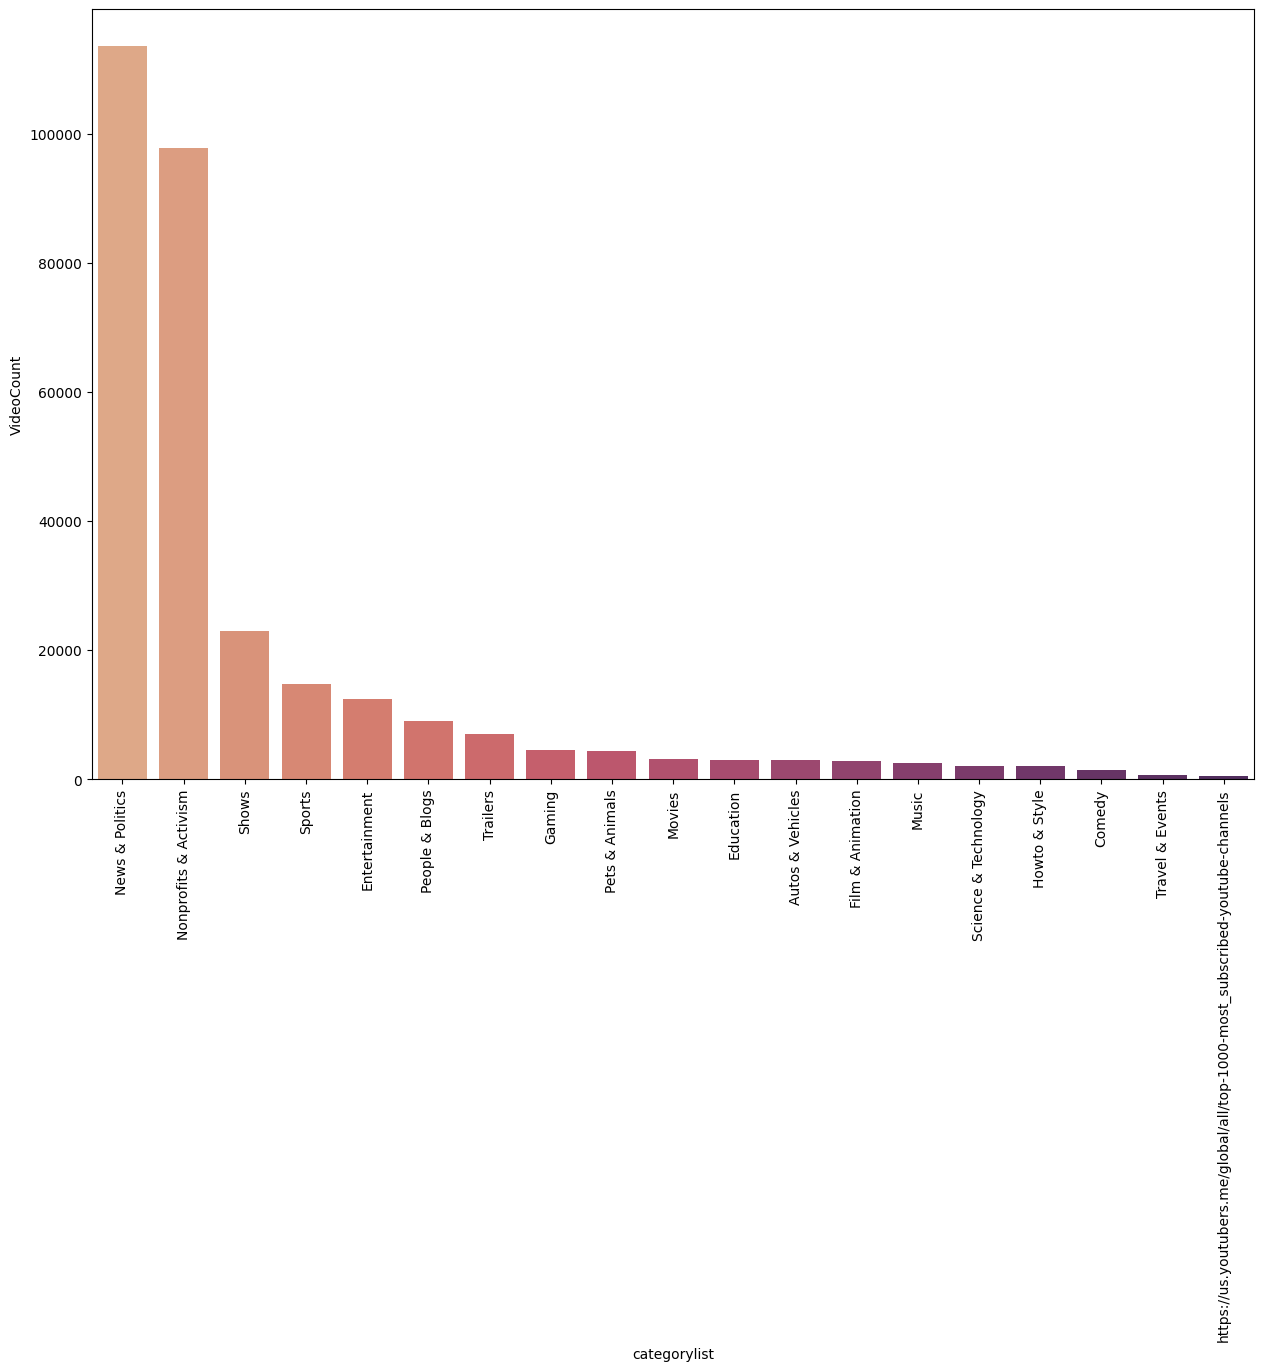

In [274]:
plt.figure(figsize=(15,10))
sns.barplot(data = sorted_df_count, x = "categorylist", y = "VideoCount", palette ="flare")
plt.xticks(rotation = 90)

In [275]:
min_year = df_yt["Started"].min()
max_year = df_yt["Started"].max()
print(min_year)
print(max_year)

1970
2021


In [276]:
#Top 10 channels in min and max year of Data#
top10min = df_yt.where(df_yt['Started'] == 1970)
channel = top10min.groupby('Youtube Channel')['Video Views'].sum().reset_index()
channel

,Youtube Channel,Video Views
0,YouTube,"2,980,922,779"


In [277]:
#Top 10 channels in min and max year of Data#
top10max = df_yt.where(df_yt['Started'] == 2021)
channel = top10max.groupby('Youtube Channel')['Video Views'].sum().reset_index()
channelsort = channel.sort_values(by = 'Video Views', ascending = False).head(10)
channelsort

,Youtube Channel,Video Views
0,Azhan5star,"8,351,014,001"
4,Priyal Kukreja,"7,984,381,092"
10,deepesh zo,"5,655,945,454"
1,LeoNata Family,"20,308,004,462"
3,MrBeast en Español,"2,959,484,997"
5,SMOL,"18,006,604,541"
2,Marta and Rustam,"16,065,818,431"
6,Sagawa /さがわ,"13,685,363,296"
7,Shorts Break,"12,771,152,207"
9,ZutiGang,"12,712,546,262"


In [278]:
#Highest Number of youtube channels started in which year#
ytcount = df_yt['Started'].value_counts()
ytcount

2014    120
2015     95
2013     88
2011     87
2012     81
2016     76
2006     69
2017     62
2009     59
2018     50
2008     45
2007     45
2010     45
2019     30
2005     21
2020     15
2021     11
1970      1
Name: Started, dtype: int64

In [279]:
max_channels_year = ytcount.idxmax()  # Year with the most channels
max_channels_count = ytcount.max()    # Number of channels in that year
print(f"The year with the highest number of channels started: {max_channels_year} ({max_channels_count} channel(s))")

The year with the highest number of channels started: 2014 (120 channel(s))


In [280]:
min_channels_year = ytcount.idxmin()  # Year with the most channels
min_channels_count = ytcount.min()    # Number of channels in that year
print(f"The year with the highest number of channels started: {min_channels_year} ({min_channels_count} channel(s))")

The year with the highest number of channels started: 1970 (1 channel(s))


In [281]:
#Top 5 category with highest view Video Views#
top5cat = df_yt.groupby('Category')['Video Views'].sum().reset_index()
channelsort = top5cat.sort_values(by = 'Video Views', ascending = False).head(5)
channelsort

,Category,Video Views
11,People & Blogs,"86,638,570,92187,202,935,67528,723,286,18548,8..."
7,Movies,"8,932,231,6925,274,337,335"
15,Sports,"73,577,695,22215,294,226,02011,509,656,9035,07..."
0,Autos & Vehicles,"7,666,147,546"
10,Nonprofits & Activism,"7,025,367,8282,668,391,636"
